In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ds1_train.csv')

In [3]:
df.head(10)

,x_1,x_2,y
0,0.411809,1.105525,0.0
1,1.274746,6.303314,0.0
2,0.115488,3.264251,0.0
3,-0.486306,0.279487,0.0
4,0.257625,1.212389,0.0
5,-1.526078,0.763353,0.0
6,0.567275,2.624184,0.0
7,0.263094,0.658812,0.0
8,0.275772,0.541577,0.0
9,-0.390170,1.403651,0.0


In [4]:
x = df[["x_1","x_2"]].to_numpy()

In [5]:
x

array([[0.41180854, 1.10552487],
       [1.27474554, 6.30331401],
       [0.11548828, 3.26425138],
       ...,
       [0.96909526, 4.51838094],
       [1.95753102, 6.08296767],
       [2.02533402, 2.72958809]])

In [6]:
x.shape

(800, 2)

In [7]:
y = df[["y"]].to_numpy()

In [8]:
y.shape

(800, 1)

In [9]:
y = y.astype(int)

In [10]:
y.shape

(800, 1)

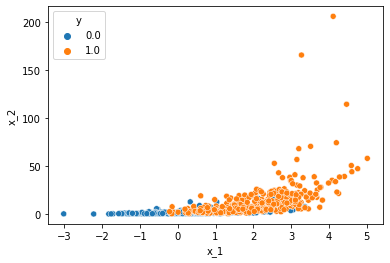

In [11]:
sns.scatterplot(x="x_1",y="x_2",hue="y",data=df)

In [12]:
zero = 0
ones = 0
for i in range(len(y)):
    if y.flatten()[i] == 0:
        zero = zero + 1
    else:
        ones = ones + 1

print(f"Number of 0's = {zero}\nNumber of 1's= {ones}")

Number of 0's = 400
Number of 1's= 400


In [13]:
#finding mu
mu0numerator = 0
mu0denominator = 0
for i in range(len(y)):
    if y.flatten()[i] == 0:
        mu0numerator = mu0numerator + x[i]
        mu0denominator = mu0denominator + 1
mu0 = mu0numerator / mu0denominator
mu0 = mu0.reshape(x.shape[1],1)
mu0

array([[0.47485551],
       [2.37467434]])

In [14]:
mu1numerator = 0
mu1denominator = 0
for i in range(len(y)):
    if y.flatten()[i] == 1:
        mu1numerator = mu1numerator + x[i]
        mu1denominator = mu1denominator + 1
mu1 = mu1numerator / mu1denominator
mu1 = mu1.reshape(x.shape[1],1)
mu1

array([[ 2.056795  ],
       [12.46040313]])

In [15]:
phi = 0
for i in range(len(y)):
    if y.flatten()[i] == 1:
        phi = phi + 1
phi = phi / len(y)
phi

0.5

In [16]:
# sigma should be of size (800,800)
# because there are 800 training examples available
sigma = np.array((x.shape[0],x.shape[0]))
m = x.shape[0]
for i in range(m):
    if y.flatten()[i] == 0:
        muyi = mu0
    else:
        muyi = mu1
    xi = x[i,:].reshape(x.shape[1],1)
    sigma = sigma + (xi-muyi).dot((xi-muyi).T)
    
sigma = sigma / m
sigma

array([[  1.95365334,   6.26804658],
       [  6.26804658, 154.60114461]])

In [99]:
sigmaInv = np.linalg.inv(sigma)
theta = sigmaInv.dot((mu1-mu0)).flatten()
theta

array([0.69021039, 0.03725366])

In [100]:
theta0 = 1 / 2 * ((mu0.T.dot(sigmaInv)).dot(mu0) - (mu1.T.dot(sigmaInv)).dot(mu1)) - np.log((1 - phi) / phi)
theta0 = theta0[0].item(0)
theta0

-1.1500161832583138

In [37]:
data = pd.read_csv("ds1_train.csv")

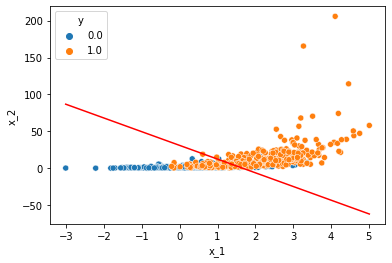

In [38]:
x1_vec = np.linspace(data["x_1"].min(),data["x_1"].max(),2)
sns.scatterplot(x="x_1", y="x_2", hue="y", data=data);
theta1 = theta.item(0)
theta2 = theta.item(1)
theta_final = [theta0,theta1,theta2]
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

In [39]:
data = pd.read_csv("ds1_test.csv")

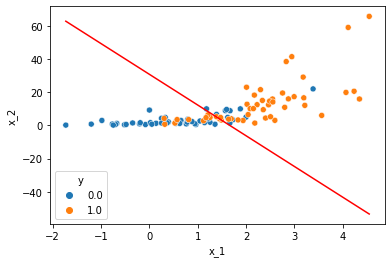

In [40]:
x1_vec = np.linspace(data["x_1"].min(),data["x_1"].max(),2)
sns.scatterplot(x="x_1", y="x_2", hue="y", data=data);
theta1 = theta.item(0)
theta2 = theta.item(1)
theta_final = [theta0,theta1,theta2]
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

In [53]:
new_x = np.array([ [1.27474554, 6.30331401]])
new_x.shape

(1, 2)

In [54]:
theta = theta.reshape(2,1)

In [177]:
df = pd.read_csv("ds1_test.csv")

In [178]:
x = df[["x_1","x_2"]].to_numpy()

In [179]:
y = df[["y"]].to_numpy()

In [180]:
prediction = 0
new_x = np.array([[1.27474554, 6.30331401]])
prediction = 1 / (1 + np.exp(-(((theta.T).dot((new_x.T))).item(0)) + theta0))
prediction

0.9059093267437073

In [182]:
count = 0
zero = 0
ones = 0
total_zero = 0
total_ones = 0
total = x.shape[0]
for i in range(x.shape[0]):
    prediction = 1 / (1 + np.exp(-(((theta.T).dot((x[i,:].T))) + theta0)))
    if prediction >= 0.5:
        prediction = 1
    else:
        prediction = 0
    if prediction == 0 and y.flatten()[i] == 0:
#         print(prediction)
        zero = zero + 1
        count = count + 1
    elif prediction == 1 and y.flatten()[i] == 1:
#         print(prediction)
        ones = ones + 1
        count = count + 1
    if y.flatten()[i] == 0:
        total_zero += 1
    else:
        total_ones += 1
        
accuracy = count / total
print(f"Prediction on Test dataset")
print(f"Number of zero's predicted correctly = {zero}\nNumber of one's predicted correctly = {ones}")
print(f"Total 0's = {total_zero}\nTotal 1's = {total_ones}")
print(f"percentage of 0's predicted = {zero / total_zero * 100}\npercentage of 1's predicted = {ones / total_ones * 100}")
print(f"Number of counts = {count}\nTotal examples = {total}")
print(f"Accuracy = {accuracy*100}%")

Prediction on Test dataset
Number of zero's predicted correctly = 38
Number of one's predicted correctly = 40
Total 0's = 50
Total 1's = 50
percentage of 0's predicted = 76.0
percentage of 1's predicted = 80.0
Number of counts = 78
Total examples = 100
Accuracy = 78.0%
